# ANKIT KUMAR- Data Preprocessing, Outlier Detection and Feature Engineering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# TASKS

>Import the Titanic dataset and display its first few rows.

In [2]:
# Load the Titanic dataset
df = pd.read_csv(r"D:\Downloads\titanic dataset.csv")

# Display the first 5 rows
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


>Identify key features (e.g., Pclass, Age, SibSp, Parch, Fare, Embarked, etc.).

In [3]:
# Display dataset columns and their data types
df.info()

# Describe numerical features
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     1309 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479,0.423224
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668,0.494259
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


>Plot initial visualizations to observe relationships between features and the target variable (Survived).

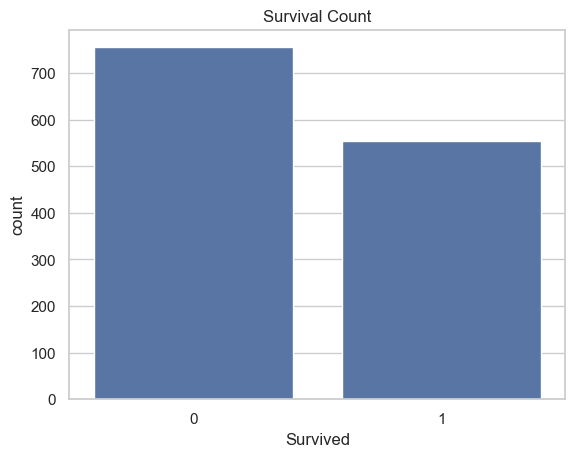

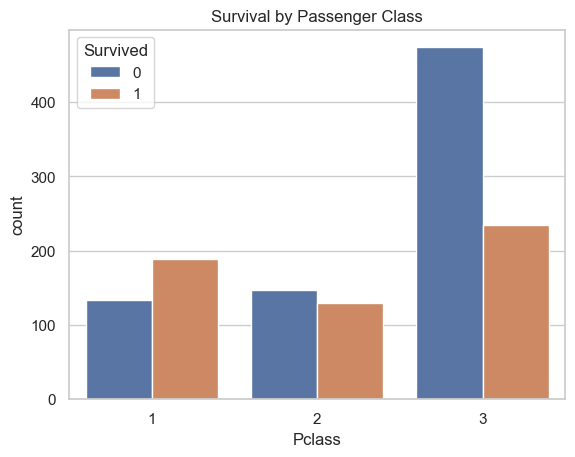

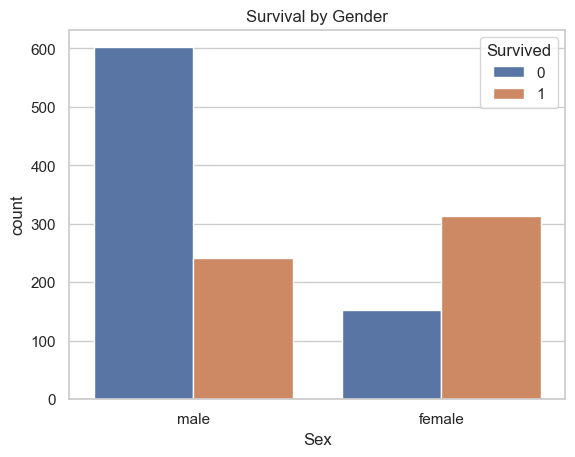

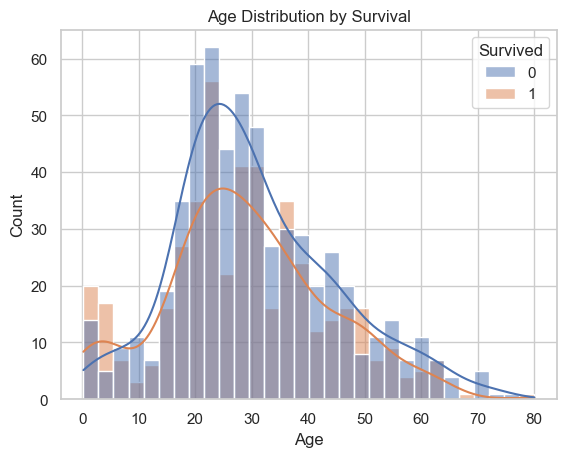

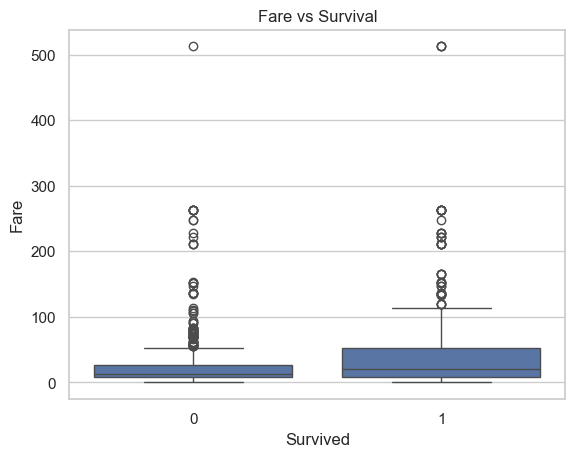

In [4]:
# Set Seaborn style
sns.set(style="whitegrid")

# 1. Survival count
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

# 2. Survival by Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

# 3. Survival by Sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

# 4. Age distribution by survival
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title("Age Distribution by Survival")
plt.show()

# 5. Fare distribution by survival
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")
plt.show()


# Data Cleaning and Preprocessing:

>Identify missing values in the dataset

In [5]:
# Check for missing values
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived          0
dtype: int64

>Impute missing values using suitable strategies (e.g., mean/median for Age, mode for Embarked, etc.).

In [6]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)


>Ensure that categorical variables are properly encoded.

In [7]:
# Encode  male → 0, female → 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})




>Detect and handle outliers in numerical features (e.g., Fare, Age).

In [8]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers in Fare and Age
df = remove_outliers(df, 'Fare')
df = remove_outliers(df, 'Age')


#  Feature Engineering:

>Title Extraction: Extract titles (e.g., Mr, Mrs, Miss) from the Name column and analyze their impact on survival.

In [9]:
# Extract Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


>Family Size: Create a new feature that combines SibSp and Parch to form FamilySize.

In [10]:
df['FamilySize'] = df['SibSp'] + df['Parch']


>IsAlone: Create a binary feature to indicate if a passenger is alone (i.e., FamilySize = 0).

In [11]:
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)


>Fare Bins: Discretize the Fare feature into quartiles.

In [12]:
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=False)


>Age Bins: Group the Age feature into bins to capture age ranges.

In [13]:
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Mid-Age', 'Senior'])


>Deck Feature: Extract the deck information from the Cabin column.

In [14]:
if 'Cabin' in df.columns:
    df['Deck'] = df['Cabin'].astype(str).str[0]


>Interaction Features: Create interaction features that combine different variables (e.g., Pclass and Sex).

In [15]:
df['PclassSex'] = df['Pclass'].astype(str) + '_' + df['Sex'].astype(str)


>Feature Encoding: Encode categorical features using methods like One-Hot Encoding.

In [16]:
# Encode categorical features
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title', 'AgeBin', 'Deck', 'PclassSex'], drop_first=True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1011 entries, 0 to 1308
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1011 non-null   int64  
 1   Pclass          1011 non-null   int64  
 2   Name            1011 non-null   object 
 3   Age             1011 non-null   float64
 4   SibSp           1011 non-null   int64  
 5   Parch           1011 non-null   int64  
 6   Ticket          1011 non-null   object 
 7   Fare            1011 non-null   float64
 8   Cabin           1011 non-null   object 
 9   Survived        1011 non-null   int64  
 10  FamilySize      1011 non-null   int64  
 11  IsAlone         1011 non-null   int64  
 12  FareBin         1011 non-null   int64  
 13  Sex_1           1011 non-null   bool   
 14  Embarked_Q      1011 non-null   bool   
 15  Embarked_S      1011 non-null   bool   
 16  Title_Dr        1011 non-null   bool   
 17  Title_Jonkheer  1011 non-null   bool  

In [18]:
df.head()


,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,...,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,PclassSex_1_1,PclassSex_2_0,PclassSex_2_1,PclassSex_3_0,PclassSex_3_1
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Unknown,0,...,False,False,False,False,True,False,False,False,True,False
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Unknown,1,...,False,False,False,False,True,False,False,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,...,False,False,False,False,False,True,False,False,False,False
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Unknown,0,...,False,False,False,False,True,False,False,False,True,False
5,6,3,"Moran, Mr. James",28.0,0,0,330877,8.4583,Unknown,0,...,False,False,False,False,True,False,False,False,True,False


# THE END